In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
label = 'rate'

In [3]:
df = pd.read_csv('data/comment/train_users.csv')
df.head()

,id,title,comment,advantages,disadvantages,title_fa_product,title_fa_category,is_buyer,verification_status,rate
0,0,NaN,مثل بقیه محصولات الکل دار پوست رو خشک نمیکنه,NaN,NaN,ژل ضد عفونی کننده دست شون مدل Aloevera حجم 300...,ضدعفونی کننده,1,1,100.0
1,1,Redmi 8,با این مبلغ اگه امکانات و ارزش خرید واستون مهم...,"[""رم4\r"",""قیمت نسبت به سایر برندها\r"",""طراحی و...","[""نداشتن هندزفری""]",گوشی موبایل شیائومی مدل Redmi 8 M1908C3IG دو س...,گوشی موبایل,1,1,80.0
2,2,عالی,خوبه فقط کج و کوله بدستم رسید ولی پسرم خیلی خو...,NaN,NaN,ماسک کودک طرح سگ نگهبان مدل رابل,ایفای نقش,1,1,100.0
3,3,NaN,در کل خوب بود ولی متاسفانه درب محصول شکسته بود...,NaN,NaN,مایع ضدعفونی کننده میوه و سبزیجات من مدل WT حج...,ضدعفونی کننده سطوح,1,1,70.0
4,4,NaN,من که خیلی باهاش حال کردم فقط من که همیشه L می...,NaN,NaN,تی شرت آستین کوتاه مردانه باینت کد 323-1 btt,تی شرت و پولوشرت مردانه,1,1,72.0


In [93]:
df.groupby('rate').count().sort_values('id')

,id,title,comment,advantages,disadvantages,title_fa_product,title_fa_category,is_buyer,verification_status,avdcount,discount,ratedis
rate,,,,,,,,,,,,
76.923077,1,1,1,1,1,1,1,1,1,1,1,1
77.391304,1,1,1,1,1,1,1,1,1,1,1,1
34.117647,1,1,1,1,1,1,1,1,1,1,1,1
50.769231,1,1,1,1,1,1,1,1,1,1,1,1
33.913043,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20.000000,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468
80.000000,43489,43489,43489,43489,43489,43489,43489,43489,43489,43489,43489,43489
60.000000,54435,54435,54435,54435,54435,54435,54435,54435,54435,54435,54435,54435


In [4]:
dft = pd.read_csv('data/comment/test_users.csv')
dft.head()

,id,title,comment,advantages,disadvantages,title_fa_product,title_fa_category,is_buyer
0,0,با کیفیت,بسته بندی بهداشتی و کیفیت عالی,NaN,NaN,گوش پاک کن کتابی پنبه ریز بسته 200 عددی,گوش پاک کن,1
1,1,گوشی موبایل شیائومی,این گوشی فوق‌العاده است,"[""این گوشی همه چیش فوق‌العاده است از دوربین تا...","[""اصلا هیچ نقاط ضعفی نداره ""]",گوشی موبایل شیائومی مدل Redmi Note 8 M1908C3JG...,گوشی موبایل,1
2,2,NaN,صداش قطع میشه باتریشم خیییلی ضعیفه,NaN,NaN,هدفون بی سیم مدل inpods 12,هدفون، هدست و هندزفری,1
3,3,NaN,بنظرم‌ خوبه,NaN,NaN,خمیر دندان نسیم مدل Feluoride Protection مقدار...,خمیر دندان,1
4,4,عااالیه,عااالیه,"[""عاااالیه""]",NaN,کرم موبر صورت و بدن سینره حجم 100 میلی لیتر,کرم موبر,1


In [4]:
df[['is_buyer']][df[['is_buyer']].isnull().any(axis=1)]

,is_buyer


In [5]:
for c in df.columns:
    df[c] = df[c].fillna("")

In [6]:
for c in dft.columns:
    dft[c] = dft[c].fillna("")

In [45]:
df.head()

,id,title,comment,advantages,disadvantages,title_fa_product,title_fa_category,is_buyer,verification_status,rate,avdcount,discount,ratedis,buyerperc
0,0,,مثل بقیه محصولات الکل دار پوست رو خشک نمیکنه,,,ژل ضد عفونی کننده دست شون مدل Aloevera حجم 300...,ضدعفونی کننده,1,1,100.0,0,0,5,0.842593
1,1,Redmi 8,با این مبلغ اگه امکانات و ارزش خرید واستون مهم...,"[""رم4\r"",""قیمت نسبت به سایر برندها\r"",""طراحی و...","[""نداشتن هندزفری""]",گوشی موبایل شیائومی مدل Redmi 8 M1908C3IG دو س...,گوشی موبایل,1,1,80.0,6,1,5,0.412621
2,2,عالی,خوبه فقط کج و کوله بدستم رسید ولی پسرم خیلی خو...,,,ماسک کودک طرح سگ نگهبان مدل رابل,ایفای نقش,1,1,100.0,0,0,5,1.000000
3,3,,در کل خوب بود ولی متاسفانه درب محصول شکسته بود...,,,مایع ضدعفونی کننده میوه و سبزیجات من مدل WT حج...,ضدعفونی کننده سطوح,1,1,70.0,0,0,4,0.887324
4,4,,من که خیلی باهاش حال کردم فقط من که همیشه L می...,,,تی شرت آستین کوتاه مردانه باینت کد 323-1 btt,تی شرت و پولوشرت مردانه,1,1,72.0,0,0,4,0.928571


In [42]:
buyerperc = df.groupby('title_fa_product').mean()['is_buyer'].to_dict()


In [85]:
d={'a':2}
d.get(3 , 0)

0

In [44]:
df['buyerperc'] = df.apply(lambda x : buyerperc.get(x['title_fa_product'],0) , axis=1)

In [82]:
def get(x , l , default=0):
    if l in df:
        return df[l]
    else:
        return default

In [86]:
dft['buyerperc'] = df.apply(lambda x : buyerperc.get(x['title_fa_product'],0) , axis=1)

<AxesSubplot:>

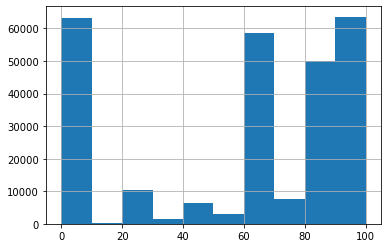

In [79]:
df[label].hist()

## needed preprocessing : 
comment  : tfidf and so on

advantage ,  disadvanteg :  count number of mentioned / one hot?

tile : one hot

title_fa_product : one hot

title_fa_category : one_hot

isbuyer: one_hot

rate : category

In [7]:
def count_adv(x):
    r = x.count('\\r')
    if(x!='' and r==0):
        r+=1
    return r

In [8]:
df['avdcount'] = df['advantages'].apply(lambda x : count_adv(x))
df['discount'] = df['disadvantages'].apply(lambda x : count_adv(x))

In [9]:
dft['avdcount'] = dft['advantages'].apply(lambda x : count_adv(x))
dft['discount'] = dft['disadvantages'].apply(lambda x : count_adv(x))

In [71]:
def label_discrtitize(x):
    if(x<20): # 0
        return 0
    elif(x<40): #30
        return 1
    elif(x<60):# 50
        return 2
    elif(x<70):# 65
        return 3
    elif(x<80): #75
        return 4
    elif(x<=90): #90
        return 5
    else:
        return 6 #100

In [20]:
df.describe()

,id,is_buyer,verification_status,rate,avdcount,discount
count,264399.000000,264399.000000,264399.000000,264399.000000,264399.000000,264399.000000
mean,132199.000000,0.915446,0.962489,57.192903,0.235738,0.118975
std,76325.561249,0.278217,0.190012,37.279288,0.649713,0.381060
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66099.500000,1.000000,1.000000,20.000000,0.000000,0.000000
50%,132199.000000,1.000000,1.000000,60.000000,0.000000,0.000000
75%,198298.500000,1.000000,1.000000,85.000000,0.000000,0.000000
max,264398.000000,1.000000,1.000000,100.000000,24.000000,14.000000


In [72]:
df["ratedis"] = df[label].apply(label_discrtitize)
df.head()

,id,title,comment,advantages,disadvantages,title_fa_product,title_fa_category,is_buyer,verification_status,rate,avdcount,discount,ratedis,buyerperc
0,0,,مثل بقیه محصولات الکل دار پوست رو خشک نمیکنه,,,ژل ضد عفونی کننده دست شون مدل Aloevera حجم 300...,ضدعفونی کننده,1,1,100.0,0,0,6,0.842593
1,1,Redmi 8,با این مبلغ اگه امکانات و ارزش خرید واستون مهم...,"[""رم4\r"",""قیمت نسبت به سایر برندها\r"",""طراحی و...","[""نداشتن هندزفری""]",گوشی موبایل شیائومی مدل Redmi 8 M1908C3IG دو س...,گوشی موبایل,1,1,80.0,6,1,5,0.412621
2,2,عالی,خوبه فقط کج و کوله بدستم رسید ولی پسرم خیلی خو...,,,ماسک کودک طرح سگ نگهبان مدل رابل,ایفای نقش,1,1,100.0,0,0,6,1.000000
3,3,,در کل خوب بود ولی متاسفانه درب محصول شکسته بود...,,,مایع ضدعفونی کننده میوه و سبزیجات من مدل WT حج...,ضدعفونی کننده سطوح,1,1,70.0,0,0,4,0.887324
4,4,,من که خیلی باهاش حال کردم فقط من که همیشه L می...,,,تی شرت آستین کوتاه مردانه باینت کد 323-1 btt,تی شرت و پولوشرت مردانه,1,1,72.0,0,0,4,0.928571


In [23]:
Xone.shape

(264399, 65939)

In [13]:
from hazm import Lemmatizer
from hazm import Normalizer
from hazm import word_tokenize
dic={}
def convert_to_stem(x):
    lem = Lemmatizer()
    if x in dic:
        return dic[x]
    else :
        dic[x] = lem.lemmatize(x)
    return dic[x]
def stem(x):
    my_normalizer = Normalizer()
    
    sents = word_tokenize((my_normalizer.normalize(x)))
    s = " ".join(list(map(convert_to_stem , sents)))
    return s

In [16]:
import time
# df['comment'] = df['comment'].apply(stem)


In [17]:
len(dic)

13801

In [18]:
# df['comment'] = df['comment'].apply(stem)
# print('first')
# dft['comment'] = dft['comment'].apply(stem)

In [76]:
len(dic)

91150

In [71]:
stem(df.iloc[0]['comment'])

'مثل بقیه محصولات الکل دار پوست رو خشک نمیکنه'

In [134]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
Xone=enc.fit_transform(df[['title','title_fa_product' , 'title_fa_category' , 'is_buyer' , 'verification_status']].values)

In [61]:

fulldf = df.append(dft)
#load stop words
import codecs

from hazm import Normalizer
l = []
with  open('persian-stopwords-master/persian', encoding='utf-8') as f:
    for w in f.readlines():
        l.append(w.replace('\n',''))


len(l)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words=l)
vectorizer = TfidfVectorizer( stop_words=l ,)
X = vectorizer.fit_transform(fulldf['comment'])
Xword = cvec.fit_transform(fulldf['comment'])

import scipy.sparse as sp
h = sp.hstack((Xone, X), format='csr')

from sklearn.decomposition import TruncatedSVD
ncomp=32
svd = TruncatedSVD(n_components=ncomp, random_state=42)
dimX = svd.fit_transform(h)
Xtrain = vectorizer.transform(df['comment'])
Xwordonly = cvec.transform(df['comment'])
# dimXtrain = svd.transform(Xtrain)

c:\users\lion\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آسانی', 'آسیب', 'اثر', 'احیانا', 'اخیرا', 'ازاین', 'اسلامی', 'اطلاعند', 'الاسف', 'البت', 'الظاهر', 'بااین', 'بازی', 'باوجودی', 'برآن', 'برنامه', 'بسته', 'بطوری', 'بفهمی', 'تازگی', 'تحریم', 'تدریج', 'ترتیب', 'تردید', 'ترند', 'تصریحا', 'تفاوتند', 'تند', 'توؤما', 'تول', 'تک', 'تی', 'ثالثا', 'ثانی', 'جمع', 'جمله', 'جنس', 'جوری', 'حاشیه', 'حسابی', 'حکما', 'خارج', 'خسته', 'خوبی', 'خودبه', 'خودی', 'داند', 'دراین', 'درحالی', 'درشتی', 'درصورتی', 'درعین', 'درپی', 'دسته', 'دلخواه', 'دنبال', 'دیوانه', 'ذاتا', 'ذلک', 'راجع', 'رسد', 'رغم', 'رود', 'روزه', 'روشنی', 'زده', 'زودی', 'ساده', 'سادگی', 'سازهاست', 'سالم', 'ساله', 'ست', 'سرعت', 'سمت', 'سه', 'سهوا', 'سیاه', 'شاأالله', 'شدت', 'صریحا', 'صندوق', 'ضد', 'ضمنا', 'طبق', 'طوری', 'عل', 'علاوه', 'علنا', 'علی', 'عملی', 'عینا', '

In [29]:
dimXtrain.shape

(264399, 32)

In [135]:
Xone.shape

(264399, 65941)

In [57]:
Xonetrain = enc.transform(df[['title','title_fa_product' , 'title_fa_category' , 'is_buyer']])

In [75]:
Xonetrain.shape

(264399, 70138)

In [58]:
hf = sp.hstack((Xonetrain, Xtrain), format='csr')

In [62]:
Xtrain = np.concatenate(
    (svd.transform(hf), 
    df[['avdcount' , 'discount' , 'buyerperc']].values), axis=1)

In [63]:
Xtrain.shape

(264399, 35)

In [103]:
Xtrain

<264399x70388 sparse matrix of type '<class 'numpy.float64'>'
	with 1706732 stored elements in Compressed Sparse Row format>

In [136]:
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(Xone, df['rate'])
# from sklearn.linear_model import LogisticRegression
# clf = RandomForestClassifier().fit(Xtrain,df['ratedis'])
# from sklearn.linear_model import LinearRegression
# reg = LinearRegression().fit(Xtrain , df[label]) #0.33
# from sklearn.ensemble import GradientBoostingRegressor
# reg = GradientBoostingRegressor().fit(Xtrain , df[label])#0.81

KeyboardInterrupt: 

In [123]:
reg.score(Xone, df['rate'])

0.890619845814895

In [124]:
clf.score(Xtrain, df['ratedis'])

0.9944742604926645

In [124]:
reg.score(h , df[label])

0.08129629680895833

In [44]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('vectorizer', vectorizer), ('dimenstionality_reduction', svd) , 
                ('clustering' , clf)])

## test

In [95]:
def continuous_rate(x):
    co = [0,30,50,60,75 , 90 , 100]
    return co[x]

In [87]:

Xonet=enc.transform(dft[['title','title_fa_product' , 'title_fa_category' , 'is_buyer']].values)

In [88]:
Xtest = vectorizer.transform(dft['comment'])

In [110]:
Xtest2 = cvec.transform(dft['comment'])

In [89]:
ht = sp.hstack((Xonet, Xtest), format='csr')

In [111]:
ht = sp.hstack((Xonet, Xtest2), format='csr')

In [90]:
dimXt = svd.transform(ht)

In [91]:
dimXt=np.concatenate((dimXt, dft[['avdcount' , 'discount' , 'buyerperc']].values), axis=1)

In [125]:
pred2 = clf.predict(dimXt)

In [126]:
pred = reg.predict(dimXt)

In [127]:
pred2 = np.array(list(map(continuous_rate , pred2)))

In [129]:
dft[label] = pred*0.5 + pred2 * 0.5
# dft[label] = dft[label].apply(continuous_rate)
dft.head()

,id,title,comment,advantages,disadvantages,title_fa_product,title_fa_category,is_buyer,avdcount,discount,buyerperc,rate
0,0,با کیفیت,بسته بندی بهداشتی و کیفیت عالی,,,گوش پاک کن کتابی پنبه ریز بسته 200 عددی,گوش پاک کن,1,0,0,0.842593,20.137391
1,1,گوشی موبایل شیائومی,این گوشی فوق‌العاده است,"[""این گوشی همه چیش فوق‌العاده است از دوربین تا...","[""اصلا هیچ نقاط ضعفی نداره ""]",گوشی موبایل شیائومی مدل Redmi Note 8 M1908C3JG...,گوشی موبایل,1,1,1,0.412621,13.350000
2,2,,صداش قطع میشه باتریشم خیییلی ضعیفه,,,هدفون بی سیم مدل inpods 12,هدفون، هدست و هندزفری,1,0,0,1.000000,34.170000
3,3,,بنظرم‌ خوبه,,,خمیر دندان نسیم مدل Feluoride Protection مقدار...,خمیر دندان,1,0,0,0.887324,89.300000
4,4,عااالیه,عااالیه,"[""عاااالیه""]",,کرم موبر صورت و بدن سینره حجم 100 میلی لیتر,کرم موبر,1,1,0,0.928571,19.910000


In [130]:
dft.describe()

,id,is_buyer,avdcount,discount,buyerperc,rate
count,19399.000000,19399.000000,19399.000000,19399.000000,19399.000000,19399.000000
mean,9699.000000,0.921336,0.228311,0.118099,0.916084,52.105835
std,5600.153272,0.269220,0.622457,0.372697,0.147069,29.716467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4849.500000,1.000000,0.000000,0.000000,0.918644,21.340833
50%,9699.000000,1.000000,0.000000,0.000000,0.960000,59.875000
75%,14548.500000,1.000000,0.000000,0.000000,0.983607,81.290000
max,19398.000000,1.000000,12.000000,8.000000,1.000000,99.830000


In [106]:
dft.sample(10)

,id,title,comment,advantages,disadvantages,title_fa_product,title_fa_category,is_buyer,avdcount,discount,buyerperc,rate
8310,8310,خوب,جوراب خوبیه.مشکلی نداره.,,,جوراب زنانه مدل SO801,جوراب زنانه,1,0,0,0.286064,79.49
7304,7304,بد نیست,خوبه. کارمو راه انداخت. برای مصارف خانگی خوبه,,,موپران آرایشگاهی مدل 254,تجهیزات زیبایی,1,0,0,1.000000,56.81
1851,1851,این محصول را توصیه میکنم,سلام دوستان ...\r\nبنظر من اگر دنبال گوشی با ق...,,,گوشی موبایل شیائومی مدل Redmi Note 8 M1908C3JG...,گوشی موبایل,0,0,0,0.958333,81.86
8429,8429,شربت اصیل,خیلی خوبه که طعم های اصیل ایرونی رو زنده نگه د...,,,شربت زعفران مصطفوی - 650 گرم,شربت و آبمیوه,0,0,0,0.960526,78.79
9196,9196,خوب,کاربردی و خوب بود.,,,کاغذ بهداشتی شیرینی پزی کد 830 بسته 8 متری,ابزار شیرینی پزی,1,0,0,0.870968,77.70
4435,4435,در کل خوب,کاش به ضرب سکه هم مثل بسته بندی توجه میشد,"[""بسته بندی""]","[""طرح خود سکه دقیق و تمیز نیست""]",طلا گرمی 18 عیار کانیار گالری طرح برج آزادی کد 22,شمش و پلاک طلا و نقره,1,1,1,0.916667,25.61
9595,9595,,من یه مدته که از رنگ مو و اکسیدان مارال استفاد...,,,اکسیدان 6 درصد مارال مدل 20vol حجم 150 میلی لیتر,اکسیدان,1,0,0,0.955224,66.88
639,639,,تو تن قشنگه، ولی همانطور که دوستان گفتم حتما د...,,,شلوار زنانه کد MJ003,شلوار جین زنانه,1,0,0,0.720000,61.67
1185,1185,خرید بسیار مناسب,خرید کالای شگفت انگیز انجام دادم واقعا تجربه خ...,,,کوله پشتی فوروارد مدل FCLT5017,کیف و کوله,1,0,0,0.764706,56.92
16033,16033,,مدت زیادی هست که از برند ADATA استفاده می‌کنم،...,,,هارد اکسترنال ای دیتا مدل HD770G ظرفیت 2 ترابایت,هارد دیسک اکسترنال,1,0,0,0.944444,74.33


In [98]:
df.describe()

,id,is_buyer,verification_status,rate,avdcount,discount,ratedis
count,264399.000000,264399.000000,264399.000000,264399.000000,264399.000000,264399.000000,264399.000000
mean,132199.000000,0.915446,0.962489,57.192903,0.235738,0.118975,2.583001
std,76325.561249,0.278217,0.190012,37.279288,0.649713,0.381060,1.622972
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66099.500000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000
50%,132199.000000,1.000000,1.000000,60.000000,0.000000,0.000000,3.000000
75%,198298.500000,1.000000,1.000000,85.000000,0.000000,0.000000,4.000000
max,264398.000000,1.000000,1.000000,100.000000,24.000000,14.000000,4.000000


In [131]:
dft[['id' , label]].to_csv('data/comment/ans2.csv' , index=False)

## somewhere else

In [132]:
import scipy

In [133]:
m scipy.stats.distributions.norm.fit(df[label])

(57.19290254367935, 37.279217873382436)